Connor Goosen</br>
GSNCON001

# Analytical Problems

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina' #Increases resolution of plots

In [18]:
def l1(x):
    return 1/2 * ( ( x*(x- np.pi/3)*(x - np.pi/2) ) /( np.pi/6 * (np.pi/6 - np.pi/3)*(np.pi/6 - np.pi/2) ) )
def l2(x):
    return np.sqrt(3)/2 * ( ( x*(x- np.pi/6)*(x - np.pi/2) ) / ( np.pi/3 *(np.pi/3 - np.pi/6)*(np.pi/3 - np.pi/2) ) )
def l3(x):
    return ( x*(x- np.pi/6)*(x - np.pi/3) )/( np.pi/2 * (np.pi/2 - np.pi/6)*(np.pi/2 - np.pi/3) )

def sin_interpolation(x):
    return l1(x) + l2(x) + l3(x)

## Question 1
### A

Using Lagrange's method of interpolation to approximate $sin(x)$ over $[0, \frac{\pi}{2}]$:<br>

Using the nodes:<br>

| i | $x_i$ | $y_i$ |
| --- | --- | --- |
| 0 | $0$ | $0$ |
| 1 | $\frac{\pi}{6}$ | $\frac{1}{2}$ |
| 2 | $\frac{\pi}{3}$ | $\frac{\sqrt{3}}{2}$ |
| 3 | $\frac{\pi}{2}$ | 1 |

and the formulae for Lagrange's Method:<br>
$$L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^n \frac{(x-x_j)}{(x_i - x_j)}$$
and, 
$$p(x) = \sum_{i = 0}^n L_i(x)y_i$$

We get the following polynomial:
$p(x) = L_0(x)y_0 + L_1(x)y_1 + L_2(x)y_2 + L_3(x)y_3$<br>
Where:<br>
$L_0(x)= \frac{ (x-x_1)(x-x_2)(x-x_3) }{ (x_0 - x_1)(x_0 - x_2)(x_0 - x_3)} = 0 $<br>
<br>
$L_1(x)= \frac{ (x-x_0)(x-x_2)(x-x_3) }{ (x_1 - x_0)(x_1 - x_2)(x_1 - x_3)} = \frac{ x(x-\frac{\pi}{3})(x-\frac{\pi}{2}) }{ \frac{\pi}{6}(\frac{\pi}{6} - \frac{\pi}{3})(\frac{\pi}{6} - \frac{\pi}{2})} $<br>
<br>
$L_2(x)= \frac{ (x-x_0)(x-x_1)(x-x_3) }{ (x_2 - x_0)(x_2 - x_1)(x_2 - x_3)} = \frac{ x(x-\frac{\pi}{6})(x-\frac{\pi}{2}) }{ \frac{\pi}{3}(\frac{\pi}{3} - \frac{\pi}{6})(\frac{\pi}{3} - \frac{\pi}{2})} $<br>
<br>
$L_3(x)= \frac{ (x-x_0)(x-x_1)(x-x_2) }{ (x_3 - x_0)(x_3 - x_1)(x_3 - x_2)} = \frac{ x(x-\frac{\pi}{6})(x-\frac{\pi}{3}) }{ \frac{\pi}{2}(\frac{\pi}{2} - \frac{\pi}{6})(\frac{\pi}{2} - \frac{\pi}{3})} $<br>
<br>

$$\rightarrow p(x) = \frac{1}{2} \frac{ x(x-\frac{\pi}{3})(x-\frac{\pi}{2}) }{ \frac{\pi}{6}(\frac{\pi}{6} - \frac{\pi}{3})(\frac{\pi}{6} - \frac{\pi}{2})} + 
\frac{\sqrt{3}}{2} \frac{ x(x-\frac{\pi}{6})(x-\frac{\pi}{2}) }{ \frac{\pi}{3}(\frac{\pi}{3} - \frac{\pi}{6})(\frac{\pi}{3} - \frac{\pi}{2})} +
\frac{ x(x-\frac{\pi}{6})(x-\frac{\pi}{3}) }{ \frac{\pi}{2}(\frac{\pi}{2} - \frac{\pi}{6})(\frac{\pi}{2} - \frac{\pi}{3})}$$

### B
Plotting the $L_i(x)$ functions for each $i$ as well as the interpolated sine funciton $p(x)$ using python's matplotlib library:

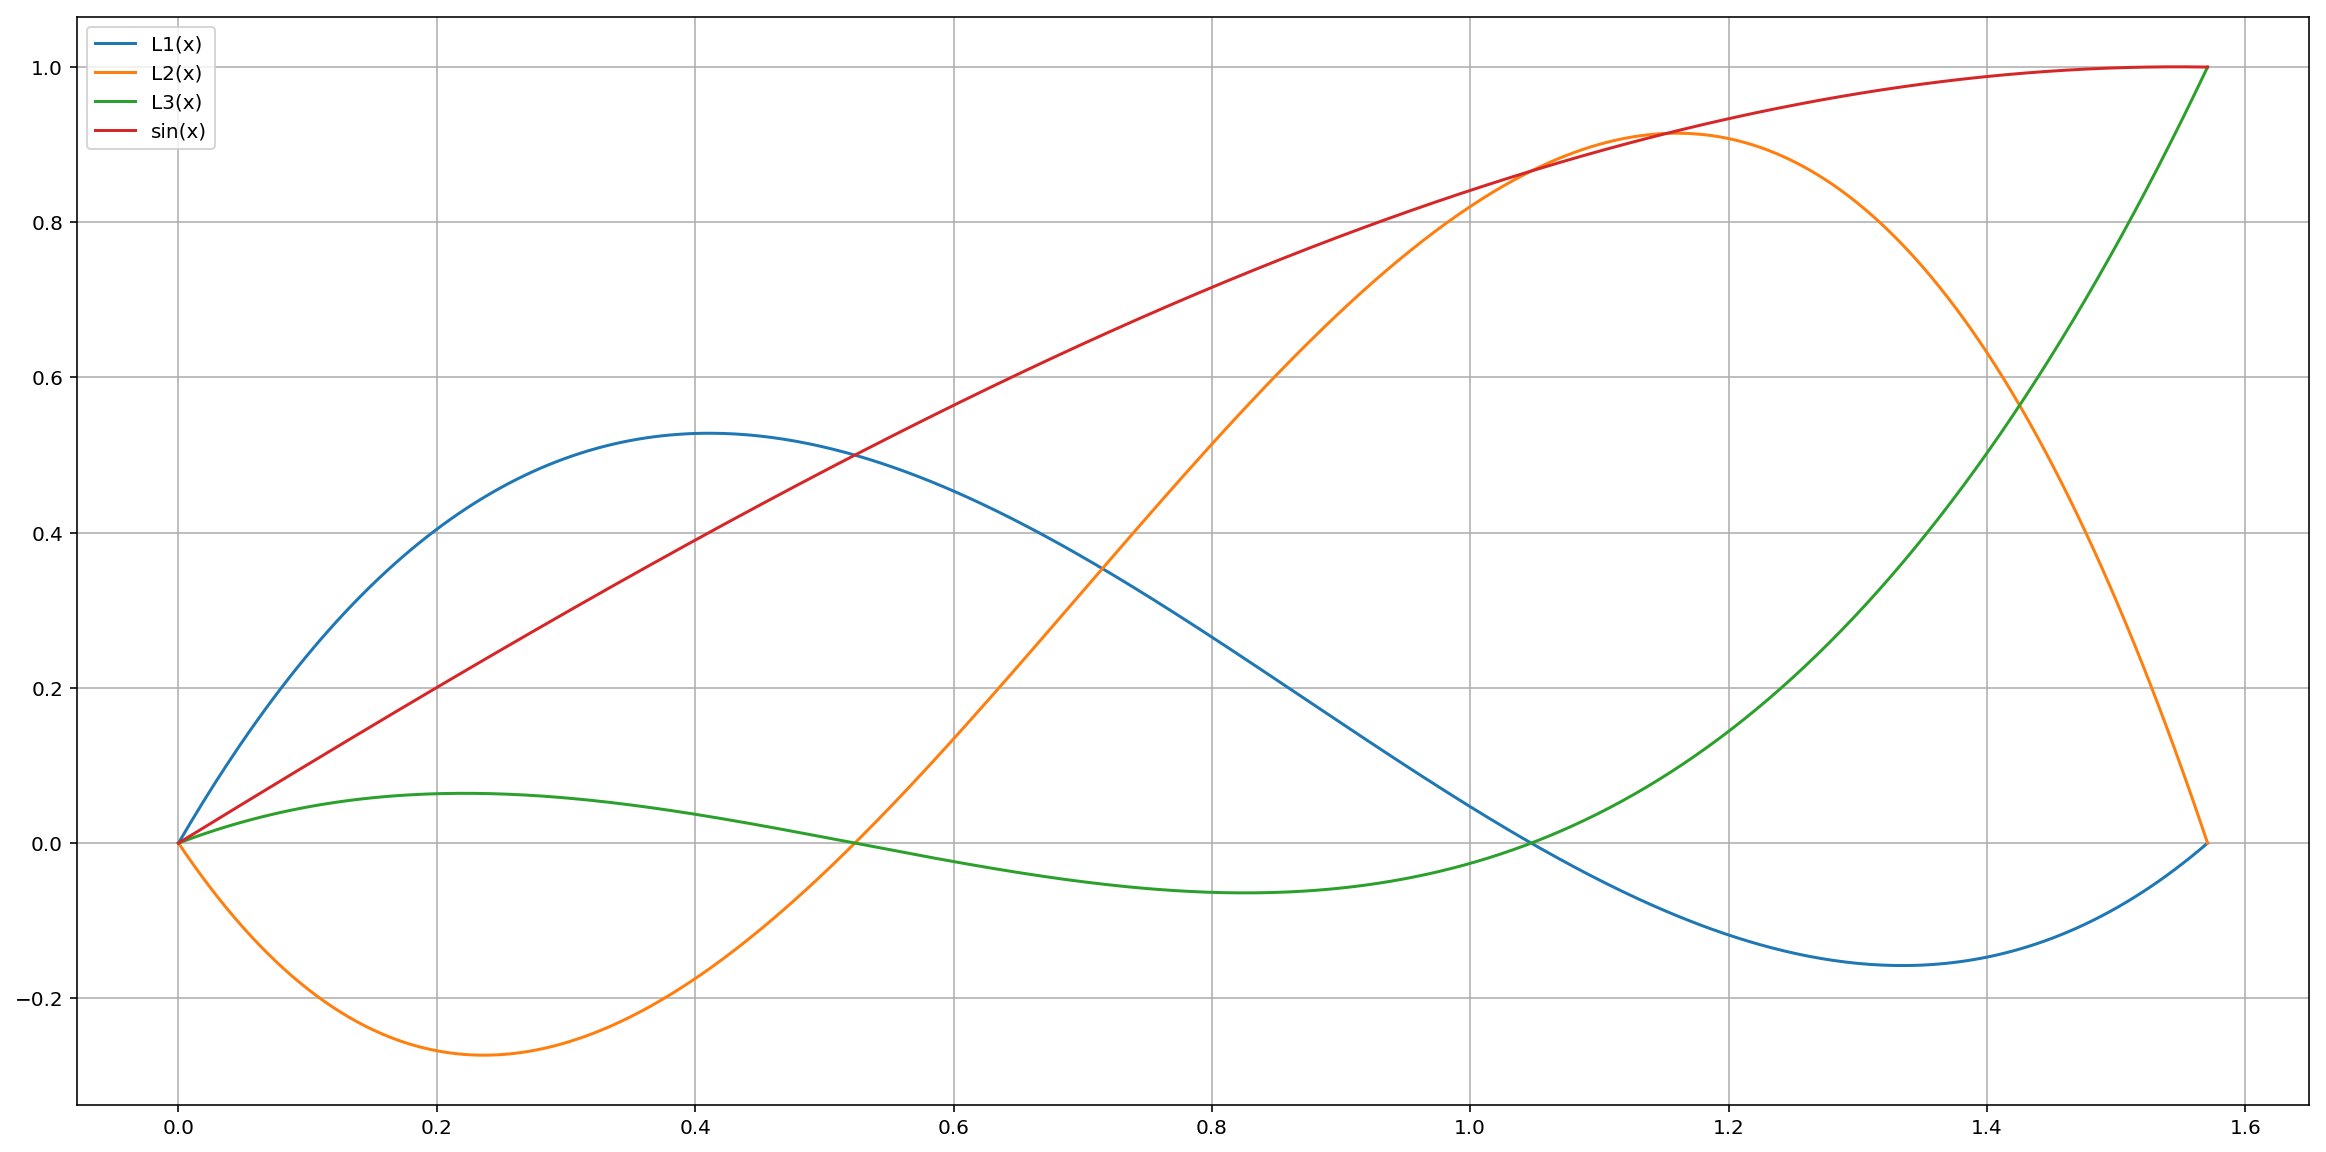

In [19]:
xs = np.linspace(0, np.pi/2, 500)
L1 = []
L2 = []
L3 = []
big_boy_sine = []

for i in range(0, len(xs), 1):
    L1.append(l1(xs[i]))
    L2.append(l2(xs[i]))
    L3.append(l3(xs[i]))
    big_boy_sine.append(sin_interpolation(xs[i]))
    
plt.figure(figsize = (20, 10))
plt.plot(xs, L1, label = "L1(x)")
plt.plot(xs, L2, label = "L2(x)")
plt.plot(xs, L3, label = "L3(x)")
plt.plot(xs, big_boy_sine, label = "sin(x)")
plt.grid()
plt.legend()

This importantly shows that $p(x)$ is equal to $L_i(x)$ at each $x_i$ which makes this a valid interpolation.

# Numerical Problems
## Question 2

We can generalise our `sin_interpolation` funciton defined above by using the fundamental properties of the sine function.<br>
Namely, we can say that any $x$ that is larger than $2\pi$ can be equally expressed by a sin funcition by that number $x$ minus $2\pi$. i.e.<br>
$sin(x) = sin(x-2\pi)$

therefore for any number $x>2\pi$, we can express it equally by subtracting $2\pi$ until $x_n \leq 2\pi$.

From here we want to be able to express any number $x>\frac{\pi}{2}$ in terms of a number $\alpha$ that is less than or equal to $\frac{\pi}{2}$<br>

These can be easily found by using the unit circle and the idea of quadrants which can be found in the code below:

### A

In [20]:
def general_sin(x):
    tmp = np.absolute(x)
    ans = 0
    while tmp > (2*np.pi):
        tmp = tmp - (2*np.pi)
        
    if (tmp <= (np.pi/2)):
        ans = sin_interpolation(tmp)  
        
    elif (tmp <= (np.pi)) and (tmp > np.pi/2):
        tmp = np.pi - tmp
        ans = sin_interpolation(tmp) 
        
    elif (tmp <= (3*np.pi)/2) and (tmp > np.pi):
        tmp = tmp - np.pi
        ans = -1 * sin_interpolation(tmp)
        
    elif (tmp <= (2*np.pi)) and (tmp > (3*np.pi)/2):
        tmp = 2*np.pi - tmp
        ans = -1* sin_interpolation(tmp)

    if x<0:
        ans = -1*ans
    return ans

### B

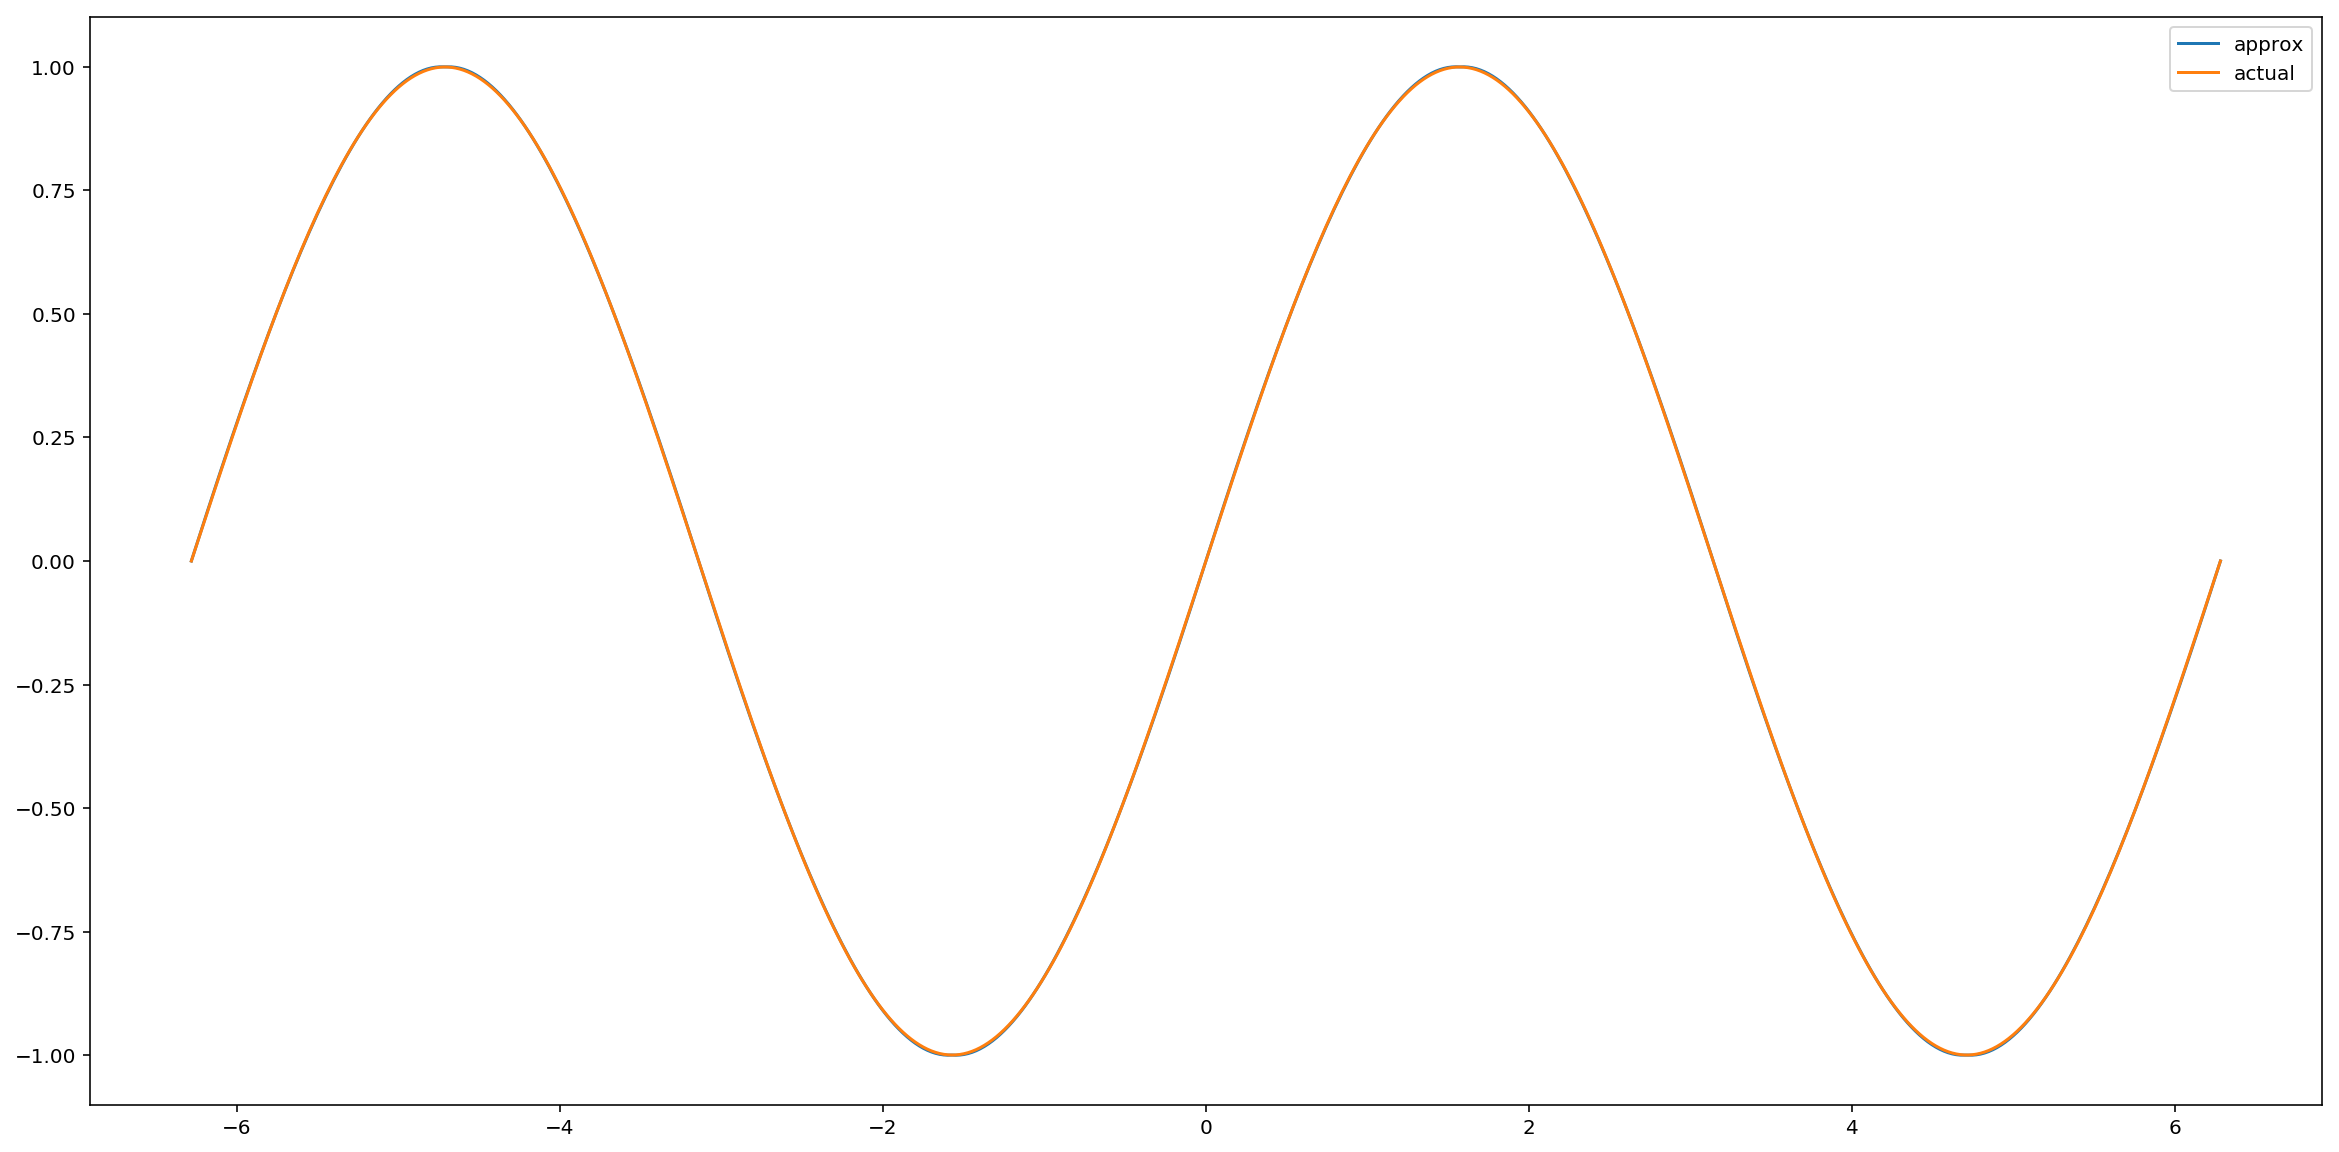

In [21]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)
yapprox = []
yactual = []

for i in range(0, len(x), 1):
    yapprox.append(general_sin(x[i]))
    yactual.append(np.sin(x[i]))
    
    
plt.figure(figsize = (20, 10))
plt.plot(x, yapprox, label = 'approx')
plt.plot(x, yactual, label = 'actual')
plt.legend()

### C

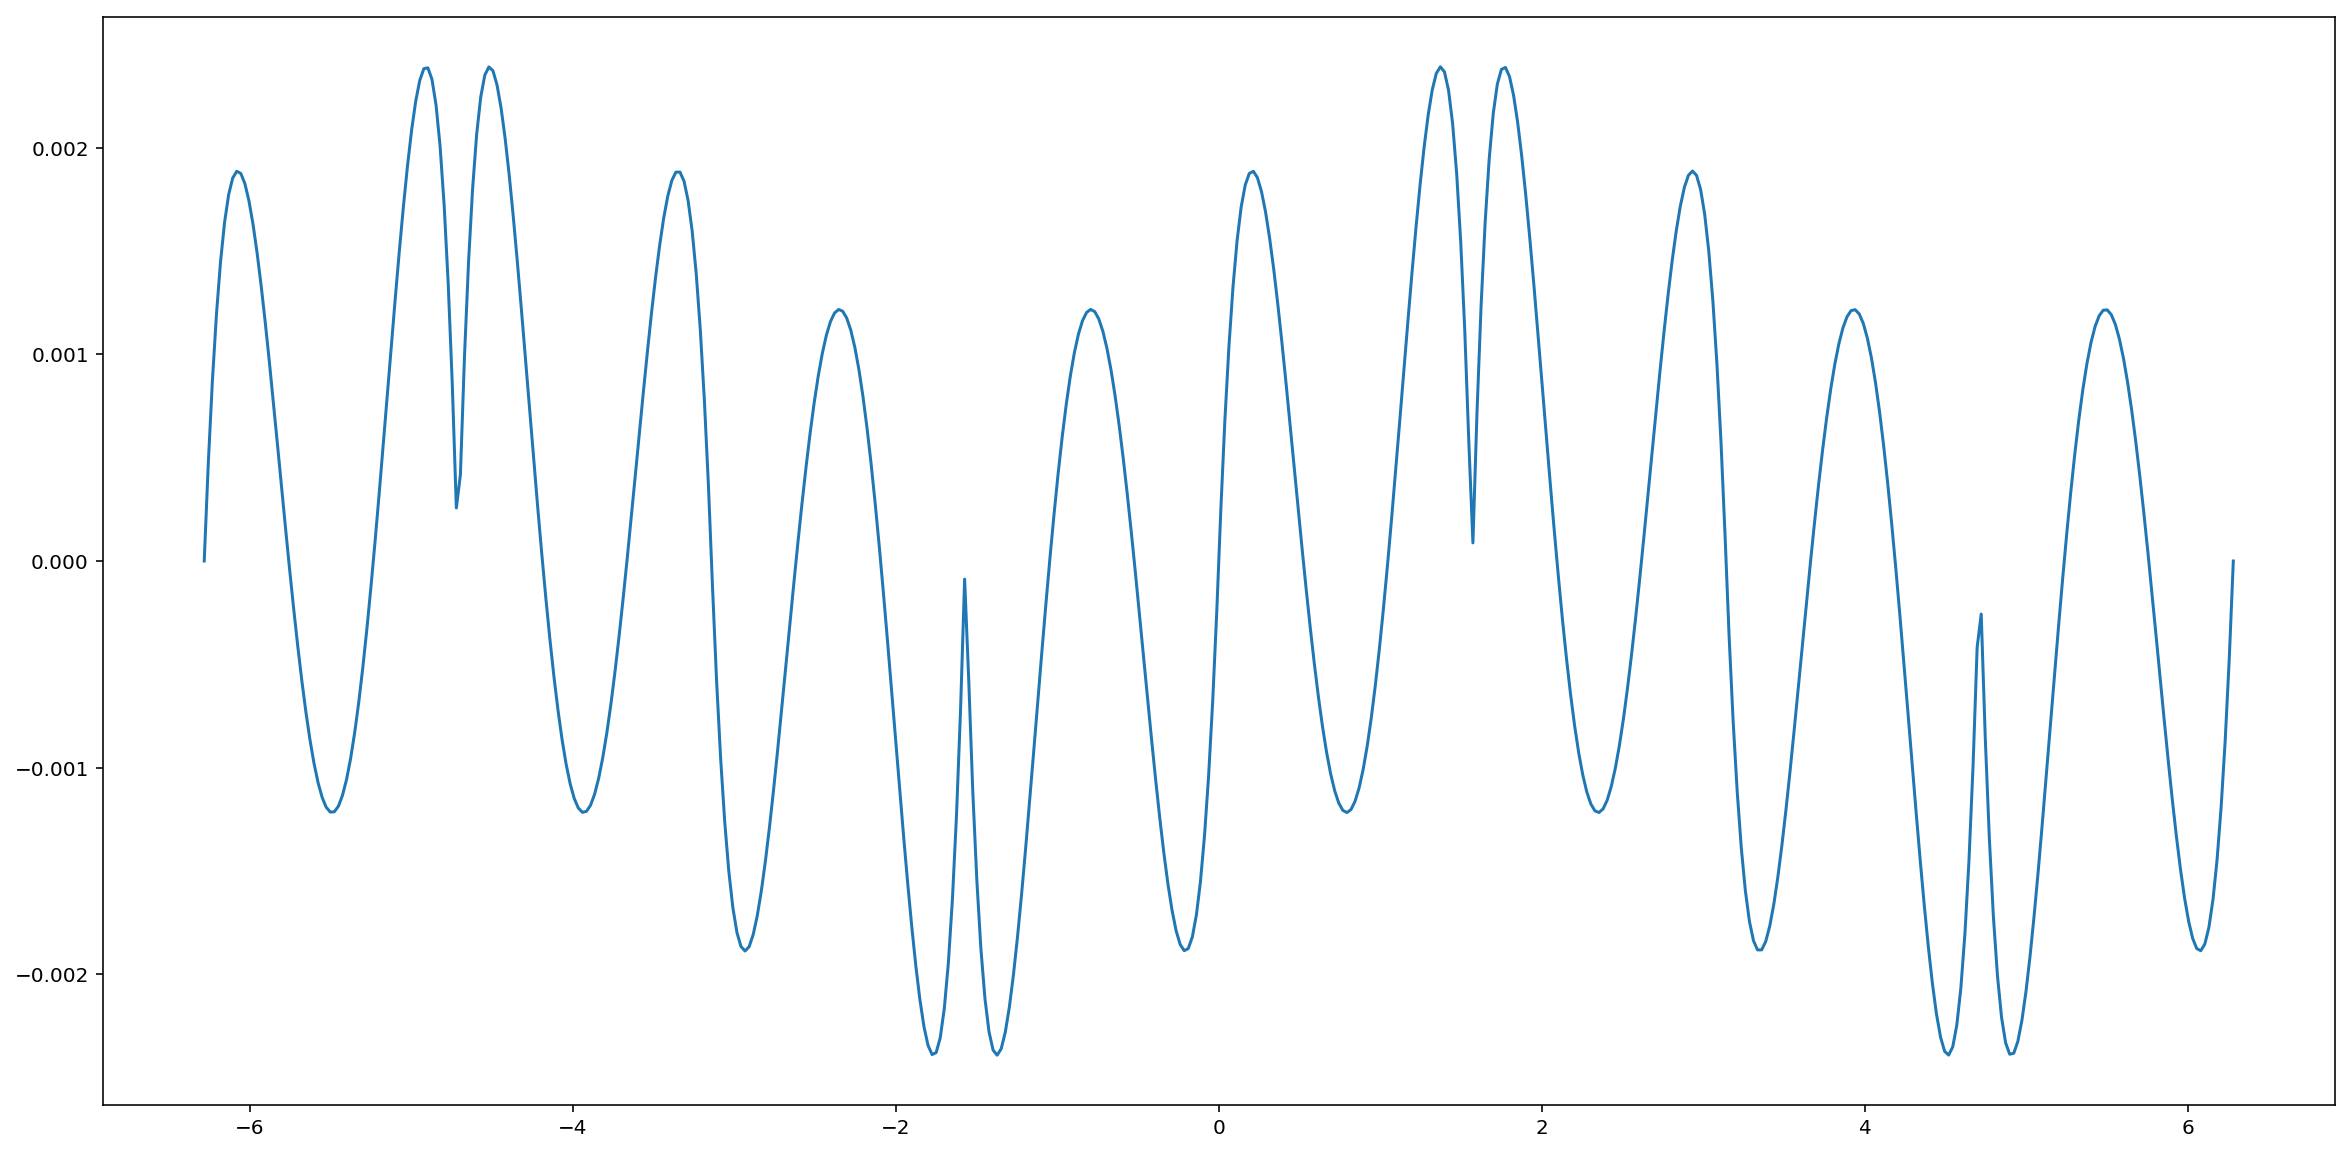

In [22]:
ydiff = []
for i in range(0, len(yapprox), 1):
    ydiff.append(yapprox[i] - yactual[i])
plt.figure(figsize = (20, 10))
plt.plot(x, ydiff)

## Question 3
### A

$$L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^n \frac{(x-x_j)}{(x_i - x_j)}$$

In [23]:
#Function to generate all the Li values for a given imput of x:
def l(x, do):
    Ln = []
    for i in range(0, len(do), 1):
        Li = 1
        for j in range(0, len(do), 1):
            if i != j:
                Li = Li*(x-do[j])/(do[i]-do[j])
        Ln.append(Li)
    return Ln

$$p(x) = \sum_{i = 0}^n L_i(x)y_i$$

In [24]:
#Gives you the interpolated value of the function at the value x
def p(x, do, ro):
    L = l(x, do)
    p = 0
    for i in range(0, len(ro), 1):
        p += L[i]*ro[i]
    return p

In [25]:
n = 21                             #Number of nodes
d = np.linspace(-1, 1, n)          #'domain' of my problem
r = []                             # Range values associated with the elements in the domain. TBD by runge function
for i in range(0, len(d), 1):
    r.append(1/(16*d[i]**2 + 1))

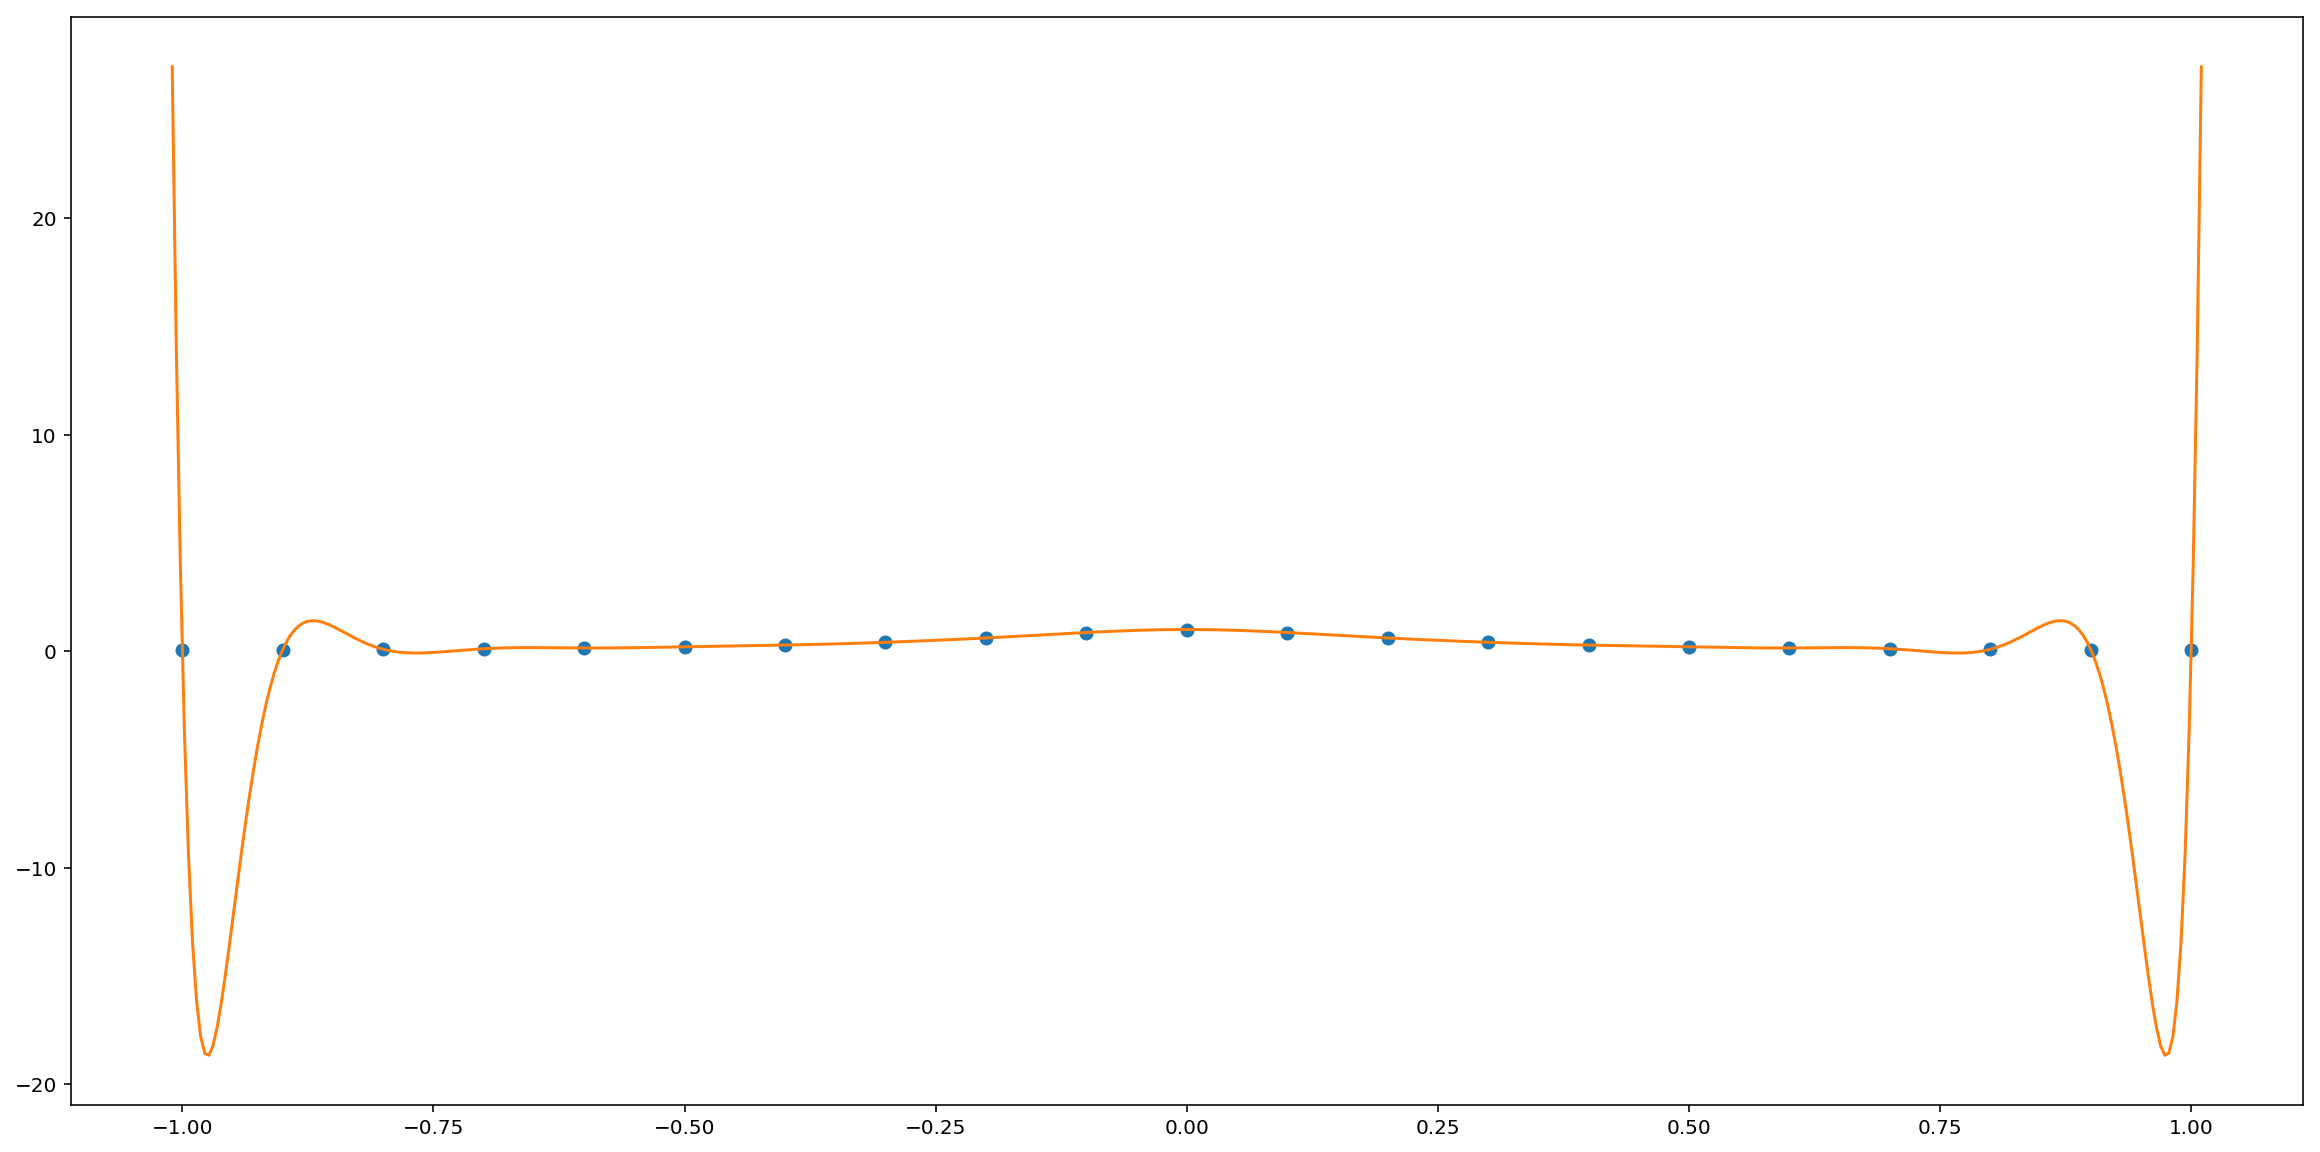

In [26]:
x = np.linspace(-1.01, 1.01, 500)
y = []
for i in range(0, len(x), 1):
    y.append(p(x[i], d, r))
plt.figure(figsize = (20, 10))
plt.plot(d, r, 'o', x, y, '-')

## B

We now use the Chebychev method of detirmining our nodes with which we interpolate:

In [27]:
dn = [] #new domain
rn = [] #new range

for i in range(1, n+1, 1): #Chebychev formula starts at one
    dn.append(np.cos(np.pi * (i - 0.5)/(n)))
    rn.append(1/(16*dn[i-1]**2 + 1))

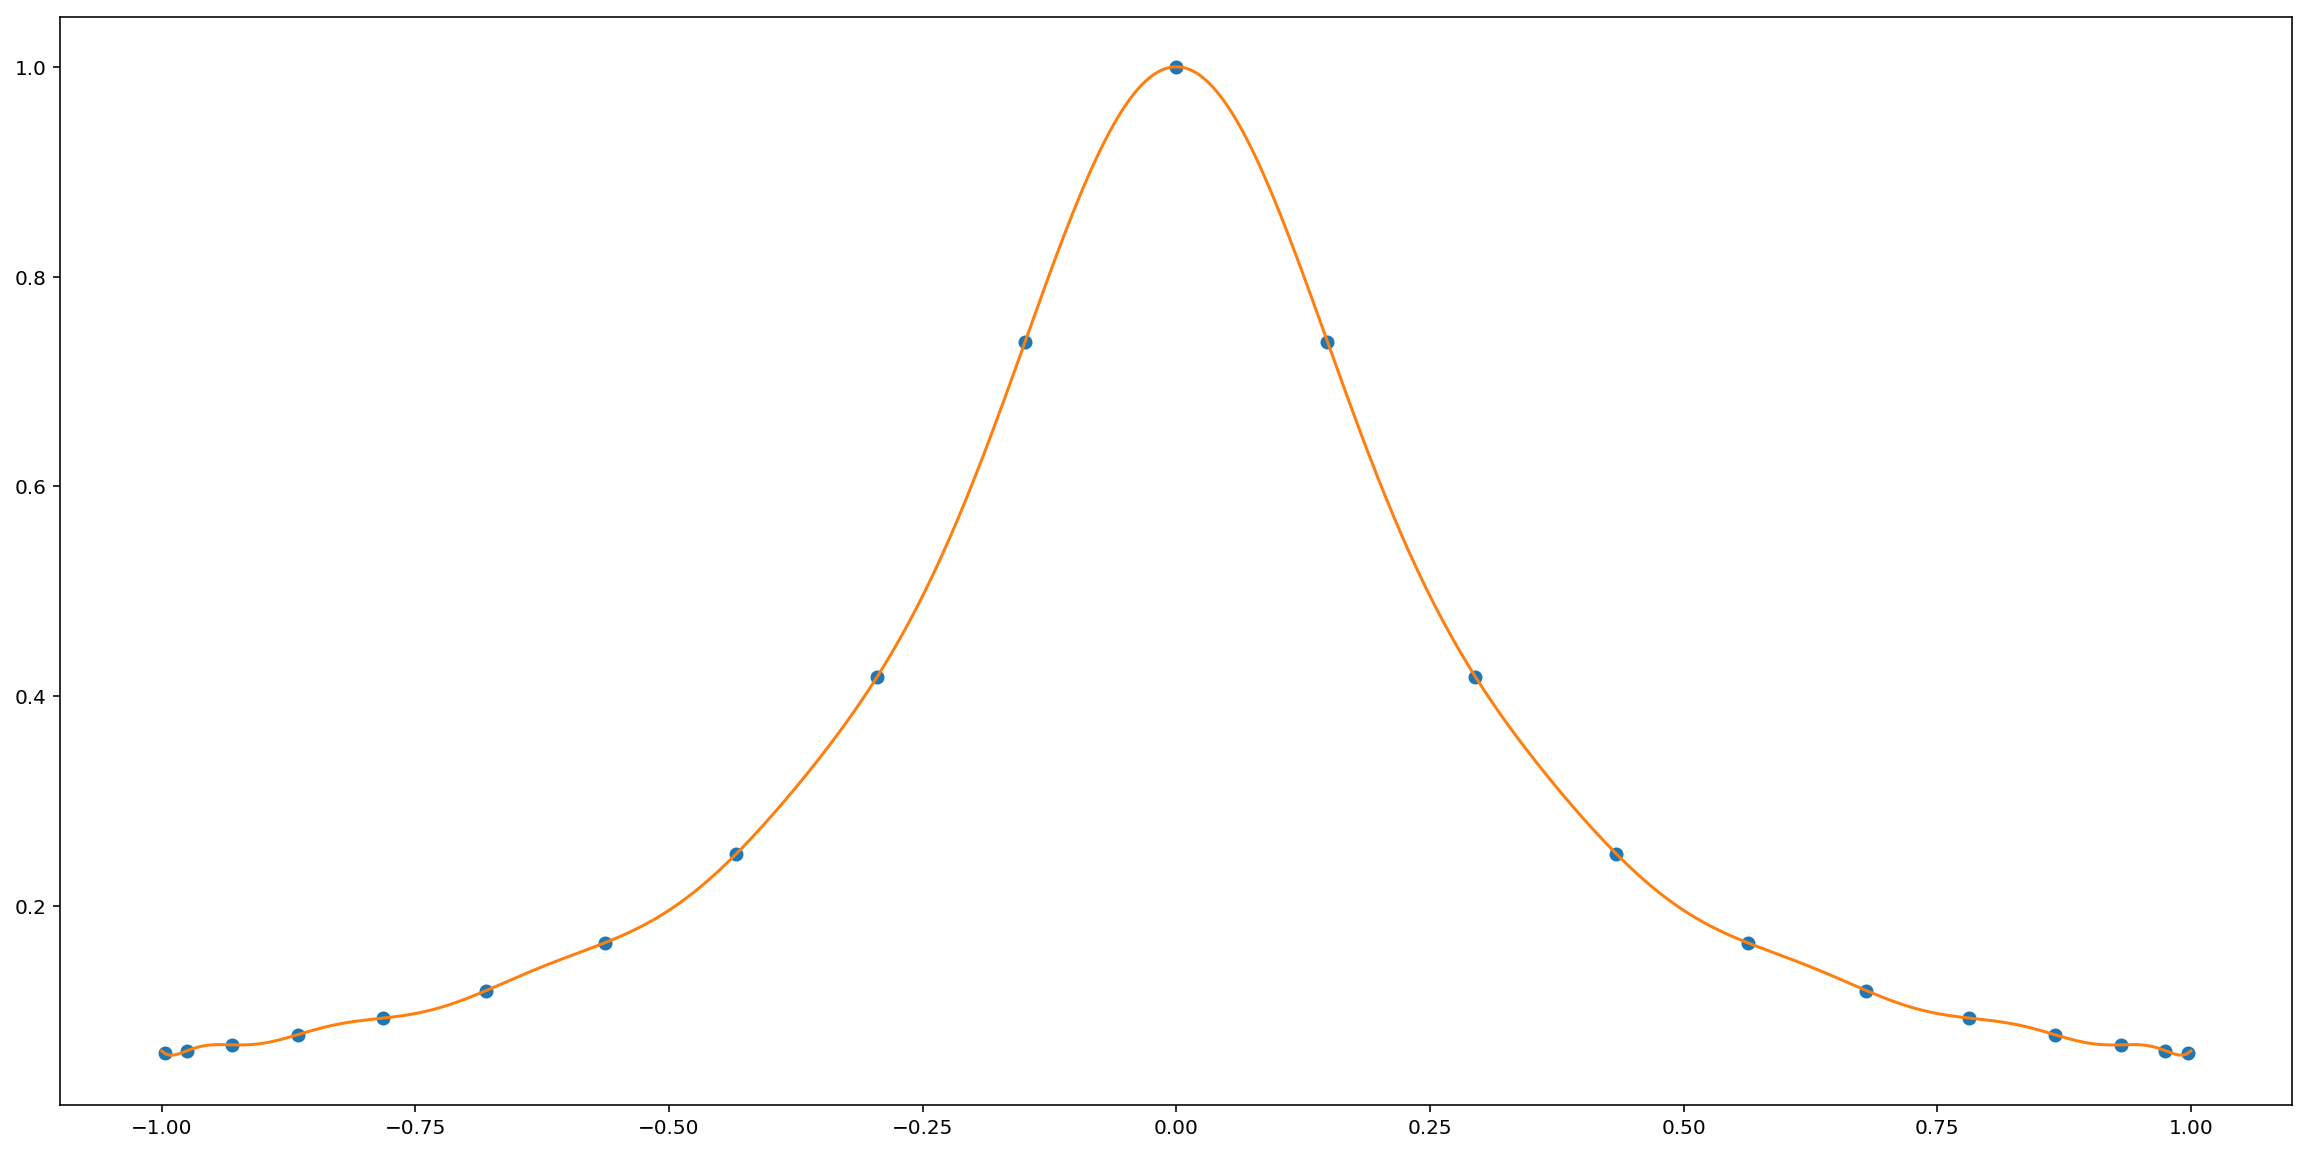

In [12]:
xn = np.linspace(-1, 1, 500)
yn = []
for i in range(0, len(xn), 1):
    yn.append(p(xn[i], dn, rn))
plt.figure(figsize = (20, 10))
plt.plot(dn, rn, 'o', xn, yn, '-')

### C
Both these plots overlayed as well as plotting the actual function $f(x) = \frac{1}{16x^2 + 1}$

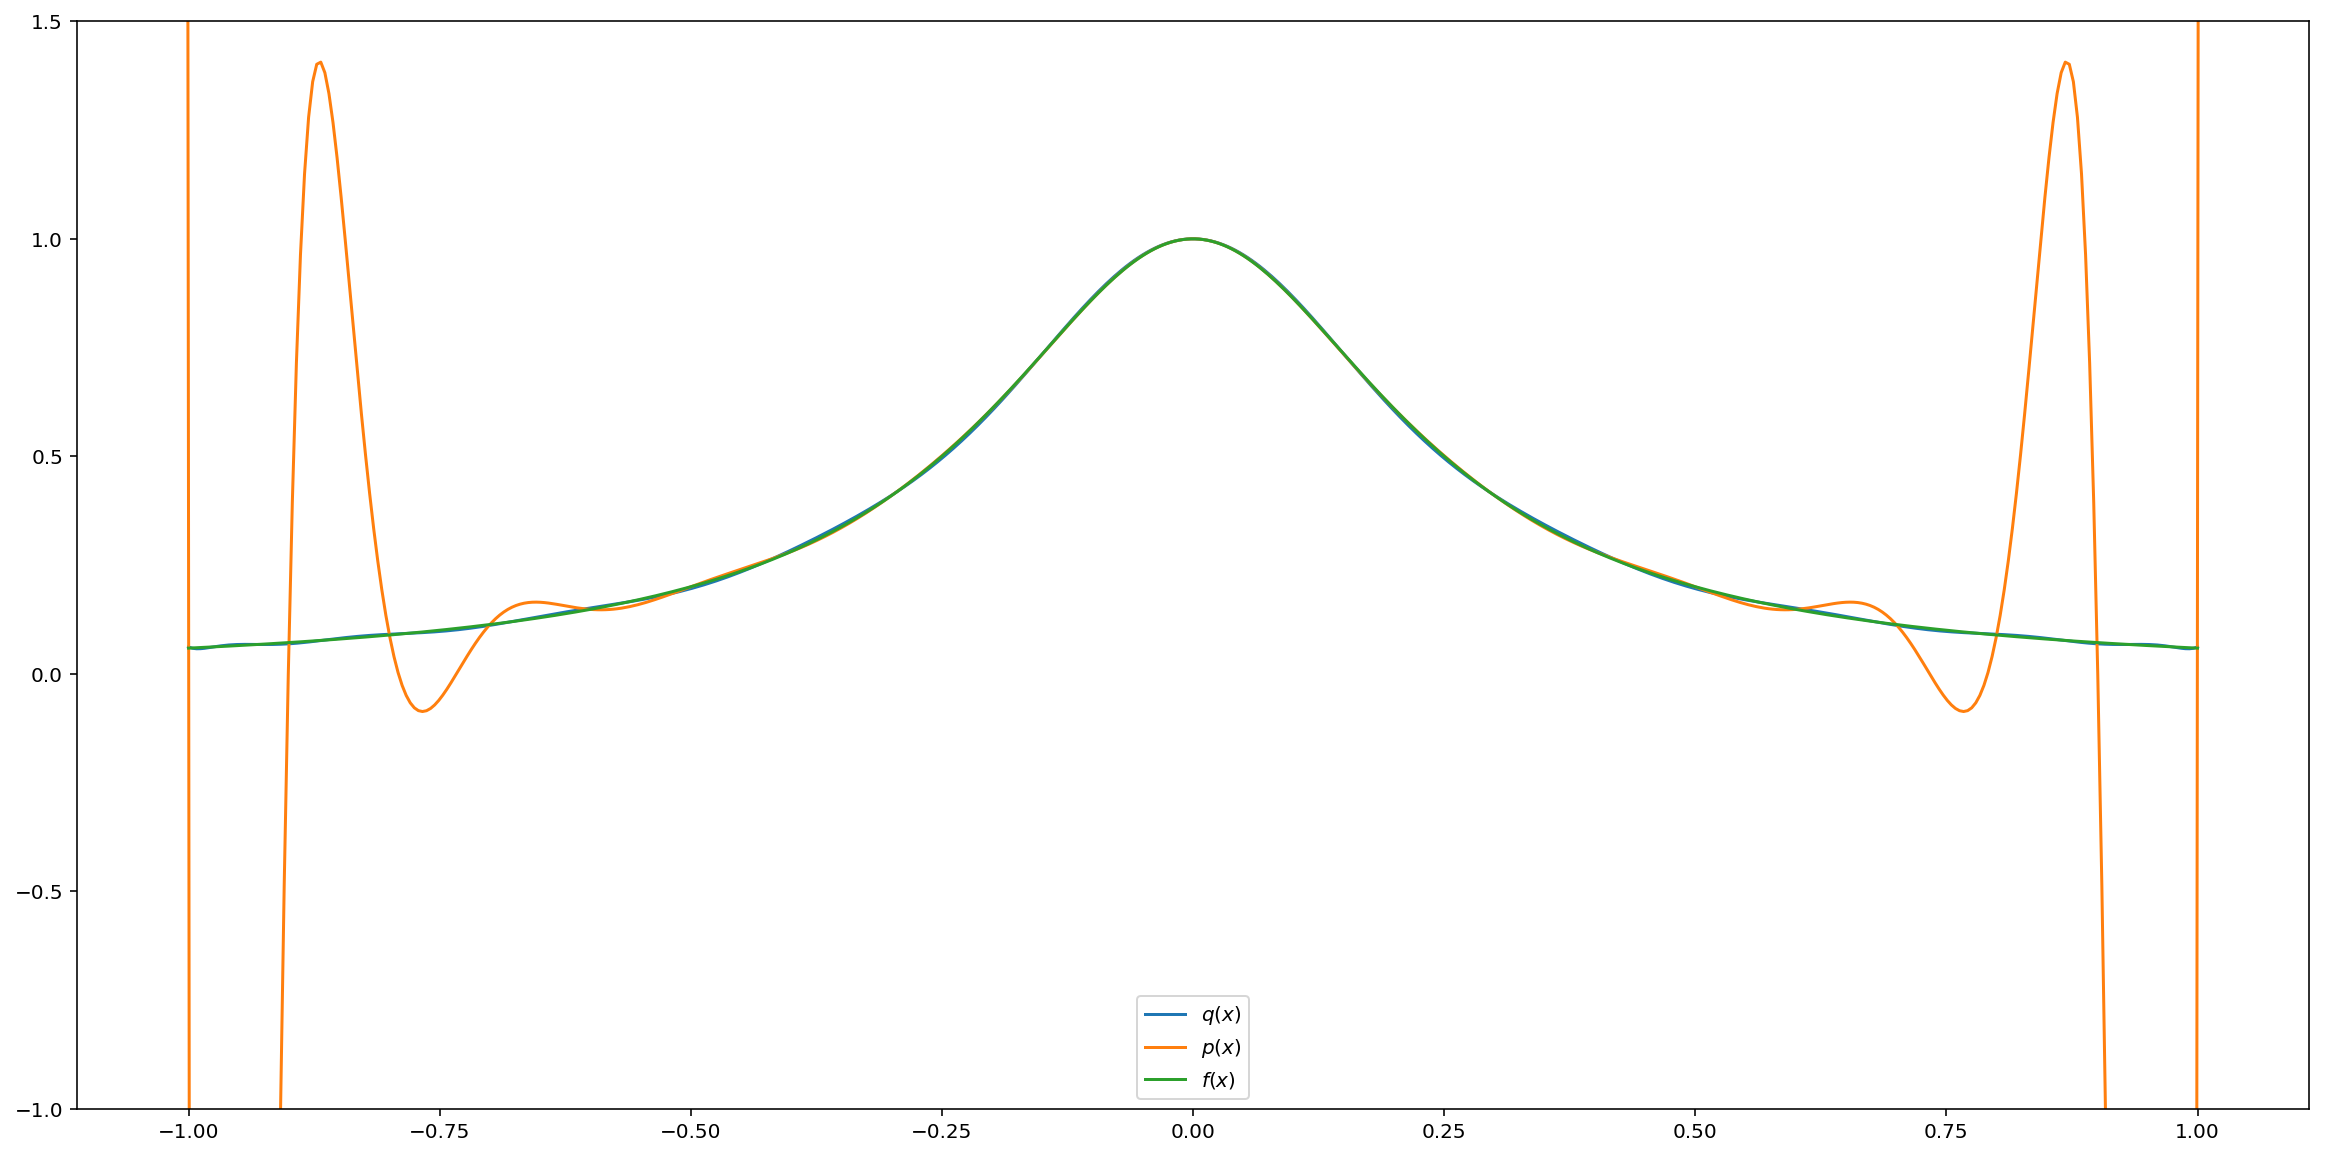

In [13]:
rungex = np.linspace(-1, 1, 500)
rungey = 1/(16*rungex**2 + 1)

plt.figure(figsize = (20, 10))
plt.ylim((-1, 1.5))
plt.plot(xn, yn, label = r'$q(x)$')
plt.plot(x, y, label = r'$p(x)$')
plt.plot(rungex, rungey, label = r'$f(x)$')
plt.legend()

### D

Seeing the graph plotted in **C** shows the initial interpolation, using linearly spaced nodes, of the Runge function is initially accurate but diverges dramatically after some time and becomes an unreliable estimate. However using the Chebychev method to generate the nodes used, when applied to the same interpolated method, approximated the function with considerably less error.<br>
<br>
This is the essence of the *Runge Phenomenon* which describes that merely adding more nodes to interpolate over does not ensure a higher accuracy of the interpolated polynomial, and that without carefully chosen nodes, oscillations at the edges of the interval can occur.